In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Loaded data into df and shows top rows.

In [2]:
# Shape, columns, info, missing
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing counts:")
print(df.isnull().sum().sort_values(ascending=False))

Shape: (891, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing counts:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


In [3]:
# Quick numeric summary
display(df.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Recorded dataset size, which columns have missing values (we saw Cabin & Age).

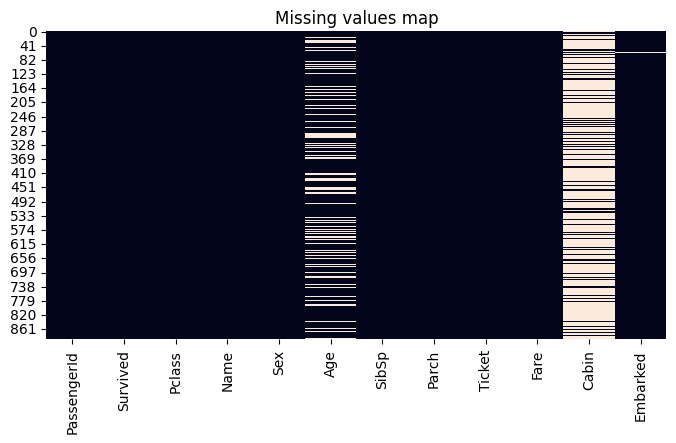

In [4]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values map')
plt.show()

Observed that the “Cabin has many missing values (≈77%). Age has ~20% missing — we'll impute Age; Cabin is too sparse to use directly but we can extract deck letter where available.”

In [6]:
# Create Deck from Cabin
df['Deck'] = df['Cabin'].fillna('Missing').astype(str).str[0]

In [9]:
# Impute Age by median per Pclass & Sex
df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-562875535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
# If any Fare missing (rare), fill with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

/tmp/ipython-input-2156285895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [12]:
# Confirm
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
dtype: int64


Described the method and why (e.g., group median by class/sex captures different demographics).



In [13]:
# Title
df['Title'] = df['Name'].str.extract(',\s*([^\.]+)\.').iloc[:,0]

In [14]:
# group rare titles
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Other')

In [15]:
# Family size & alone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [16]:
# Age band
df['AgeBand'] = pd.cut(df['Age'], bins=[0,12,20,40,60,120], labels=['Child','Teen','Adult','Middle','Senior'])

In [18]:
# Fare band (quartiles)
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=False)

Written the short line for each new feature — why it helps (Family size → survival likelihood, Title captures social rank).

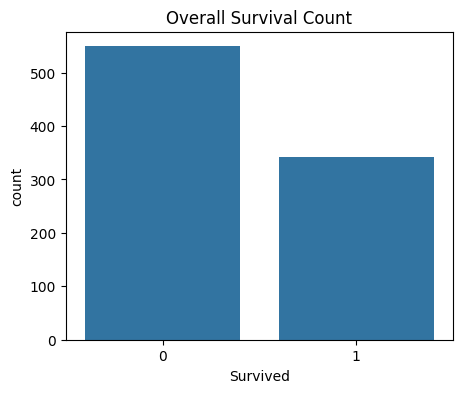

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Count')
plt.show()

% survived vs not; baseline survival rate (e.g. 38% survived).

/tmp/ipython-input-1723189903.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


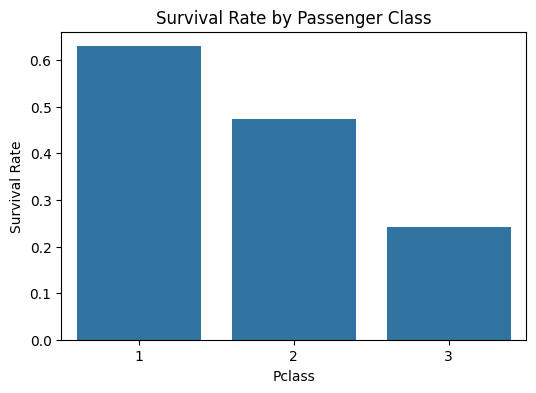

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

“1st class had much higher survival probability vs 3rd.”

/tmp/ipython-input-3095282569.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


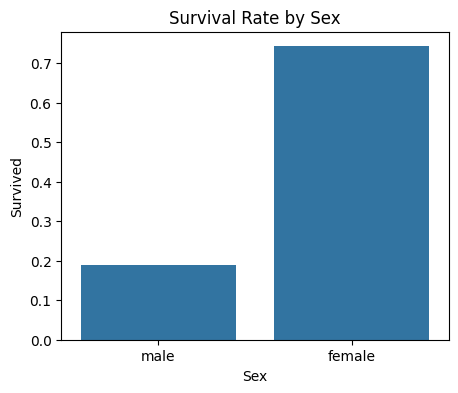

In [21]:
plt.figure(figsize=(5,4))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Sex')
plt.show()

“Females had a higher survival rate (women/children first).”

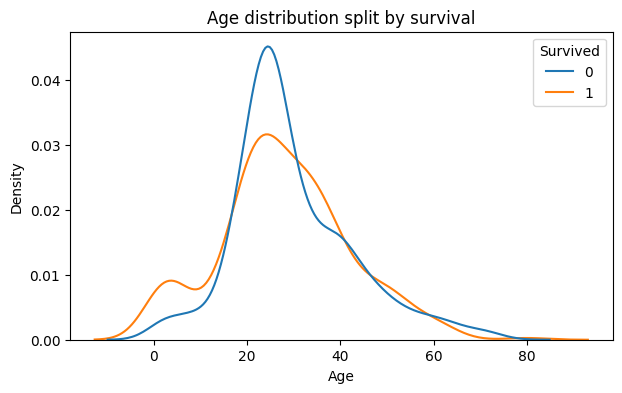

In [22]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='Age', hue='Survived', common_norm=False)
plt.title('Age distribution split by survival')
plt.show()

“Younger passengers show different distribution — children tended to be saved more.”

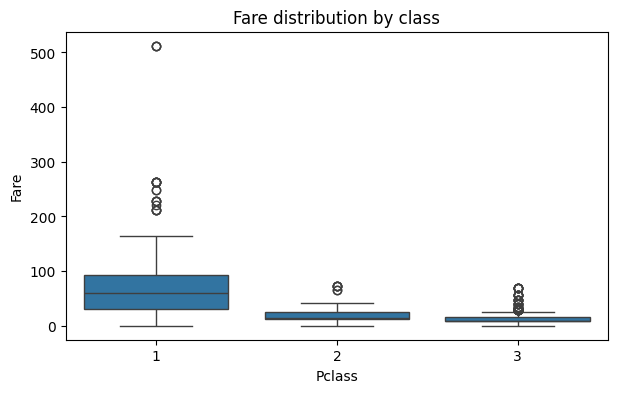

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare distribution by class')
plt.show()

“Higher classes had higher fares and more spread — price is tied to cabin/amenities.”

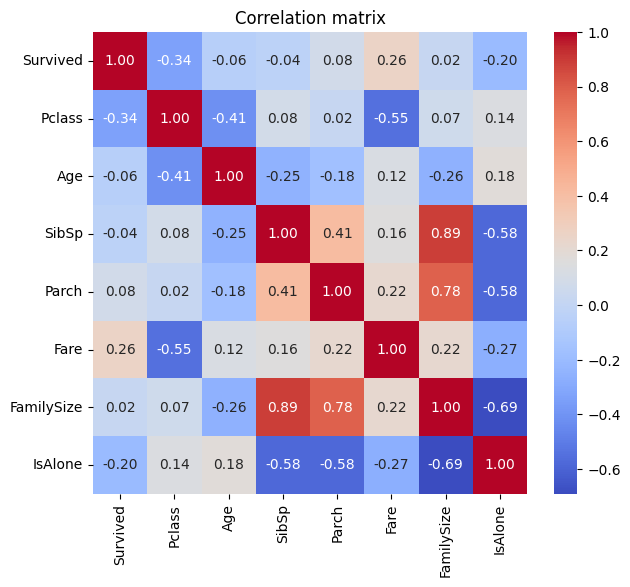

In [24]:
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize','IsAlone']
corr = df[num_cols].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

Noted strongest correlations (e.g., Pclass negatively correlated with survival; FamilySize maybe slight effect).

In [25]:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square Pclass vs Survived
ct = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, exp = chi2_contingency(ct)
print("Chi2 p-value (Pclass vs Survived):", p)

Chi2 p-value (Pclass vs Survived): 4.549251711298793e-23


In [26]:
# t-test Age
surv_age = df[df['Survived']==1]['Age'].dropna()
not_age = df[df['Survived']==0]['Age'].dropna()
t_stat, p_age = ttest_ind(surv_age, not_age, nan_policy='omit')
print("t-test p-value (Age difference):", p_age)

t-test p-value (Age difference): 0.07548530586360941


 statistical conclusion like “p < 0.05 → reject null; class/age significantly associated with survival.”
